<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Bruno PC\AppData\Local\Temp\ipykernel_11212\2130247868.py:12: SyntaxWarning: invalid escape sequence '\s'
  x_treino = pd.read_csv('X_train.txt', sep='\s+', header=None)
C:\Users\Bruno PC\AppData\Local\Temp\ipykernel_11212\2130247868.py:26: SyntaxWarning: invalid escape sequence '\s'
  x_test = pd.read_csv('X_test.txt', sep='\s+', header=None)


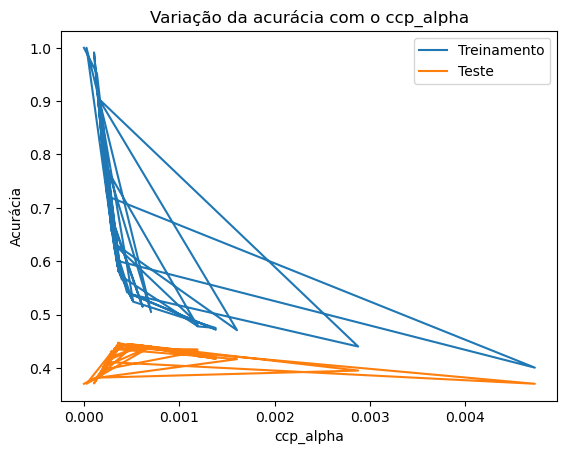

Tamanhos inconsistentes:
ccp_alphas: 233
train_scores: 47
test_scores: 47


C:\Users\Bruno PC\AppData\Local\Temp\ipykernel_11212\2130247868.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=45)


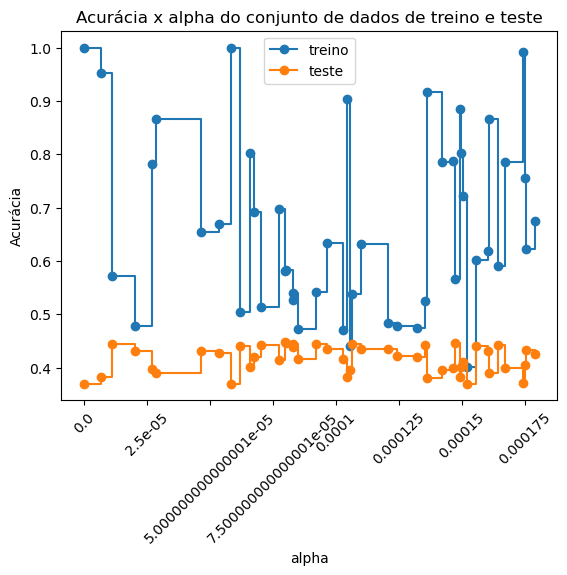

A melhor acurácia que se pode obter com esse modelo é: 0.45


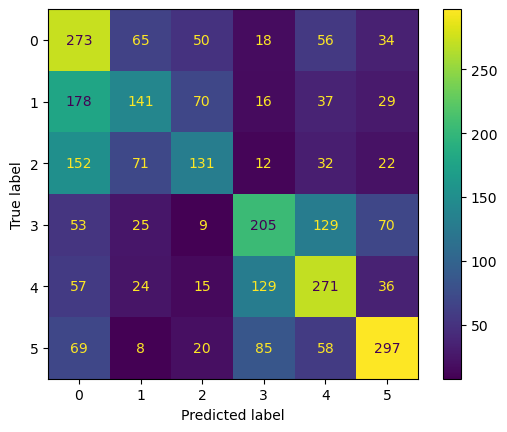

In [8]:
# importando as bibliotecas necessária
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# carregando os arquivos base de treino x
serie_caract = pd.read_csv('features.txt', sep='\t', header=None)
serie_sub_train = pd.read_csv('subject_train.txt', sep='\t', header=None)
x_treino = pd.read_csv('X_train.txt', sep='\s+', header=None)

# criando o df onde as colunas são serie_caract e as linhas são x_treino
x_treino.columns = serie_caract

# criando a coluna de id_indiv
x_treino['id_indiv'] = serie_sub_train

# criando o df com dois índicies
x_treino.set_index([x_treino.index,'id_indiv'], inplace=True)
x_treino.head(3)

# carregando os arquivos base de teste x
serie_sub_test = pd.read_csv('subject_test.txt', sep='\t', header=None)
x_test = pd.read_csv('X_test.txt', sep='\s+', header=None)

# criando o df onde as colunas são serie_caract e as linhas são x_test
x_test.columns = serie_caract

# criando a coluna de id_indiv
x_test['id_indiv'] = serie_sub_test

# criando o df com dois índicies
x_test.set_index([x_test.index,'id_indiv'], inplace=True)

# carregando os arquivos base de treino y 
y_treino = pd.read_csv('y_train.txt', header=None)

# carregando os arquivos base de teste y
y_test = pd.read_csv('y_test.txt', header=None)

# Selecionar apenas as três primeiras colunas
x_treino_3_colunas = x_treino.iloc[:, :3]
x_test_3_colunas = x_test.iloc[:, :3]

# Criando a árvore de decisão com o parâmetro min_samples_leaf = 20
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
path = clf.cost_complexity_pruning_path(x_treino_3_colunas, y_treino)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# criando uma lista com os ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(x_treino_3_colunas, y_treino)
    clfs.append(clf)

# Extrair os valores de ccp_alpha de cada classificador e armazenar em uma lista
ccp_alpha_valores = [clf.ccp_alpha for clf in clfs]

# Encontrar os valores únicos de ccp_alpha (transformano em conjunto)
ccp_alphas_unico = set(ccp_alpha_valores)

# Retornando o conjunto para lista
ccp_alphas_unico_list = list(ccp_alphas_unico)
ccp_alphas_unico_list

# Selecionando apenas 1 a cada 5 valores de ccp_alphas_único
ccp_alphas_fracionados = ccp_alphas_unico_list[::5]

# Criando os classificadores com os valores selecionados
clfs_fracionado = []
for ccp_alpha in ccp_alphas_fracionados:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha)
    clf.fit(x_treino_3_colunas, y_treino)
    clfs_fracionado.append(clf)

# Listas para armazenar as acurácias
acuracias_treino = []
acuracias_teste = []

for clf in clfs_fracionado:
    # Previsões na base de treinamento
    y_pred_train = clf.predict(x_treino_3_colunas)
    acuracia_train = accuracy_score(y_treino, y_pred_train)
    acuracias_treino.append(acuracia_train)

    # Previsões na base de teste
    y_pred_test = clf.predict(x_test_3_colunas)
    acuracia_test = accuracy_score(y_test, y_pred_test)
    acuracias_teste.append(acuracia_test)

# Gerando os gráficos
plt.plot(ccp_alphas_fracionados, acuracias_treino, label='Treinamento')
plt.plot(ccp_alphas_fracionados, acuracias_teste, label='Teste')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Variação da acurácia com o ccp_alpha')
plt.legend()
plt.show()

train_scores = [clf.score(x_treino_3_colunas, y_treino) for clf in clfs_fracionado]
test_scores  = [clf.score(x_test_3_colunas, y_test)   for clf in clfs_fracionado]

# Verificar consistência nos tamanhos
if len(ccp_alphas) != len(train_scores) or len(ccp_alphas) != len(test_scores):
    print("Tamanhos inconsistentes:")
    print(f"ccp_alphas: {len(ccp_alphas)}")
    print(f"train_scores: {len(train_scores)}")
    print(f"test_scores: {len(test_scores)}")
    ccp_alphas = ccp_alphas[:len(train_scores)]  # Ajustar o tamanhos

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
ax.set_xticklabels(ax.get_xticks(), rotation=45)
plt.show()

# encontrando o índice da melhor árvore
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs_fracionado[ind_melhor_arvore]

# Calcular a acurácia do melhor modelo com os dados de teste
melhor_arvore_acuracia = melhor_arvore.score(x_test_3_colunas, y_test)

print(f"A melhor acurácia que se pode obter com esse modelo é: {melhor_arvore_acuracia:.2f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fazer as predições
y_pred = melhor_arvore.predict(x_test_3_colunas)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()